# 1. **Load Data**

In [2]:
import pandas as pd

data = pd.read_csv('communities_and_crime_less_missing.csv')
data

,State,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,...,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit
0,NJ,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,...,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0
1,PA,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0
2,OR,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0
3,NY,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0
4,MN,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,...,0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,CA,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,...,0,18.90,52.67,39.19,74.58,85.88,16.7,3365.4,0.59,0.0
2211,LA,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,...,0,2.24,75.16,49.12,78.79,92.85,7.3,1682.8,1.15,0.0
2212,CA,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,...,0,7.35,48.66,46.73,75.54,92.30,27.5,1195.2,0.12,0.0
2213,TX,13547,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,...,0,2.28,82.26,54.05,79.72,94.06,6.3,2142.2,0.00,0.0


#**2. Data Visualization**

  State    pop  perHoush  pctBlack  pctWhite  pctAsian  pctHisp  pct12-21  \
0    NJ  11980      3.10      1.37     91.78      6.50     1.88     12.47   
1    PA  23123      2.82      0.80     95.57      3.44     0.85     11.01   
2    OR  29344      2.43      0.74     94.33      3.43     2.35     11.36   
3    NY  16656      2.40      1.70     97.35      0.50     0.70     12.55   
4    MN  11245      2.76      0.53     89.16      1.17     0.52     24.46   

   pct12-29  pct16-24  ...  persHomeless  pctForeignBorn  pctBornStateResid  \
0     21.44     10.93  ...             0           10.66              53.72   
1     21.30     10.48  ...             0            8.30              77.17   
2     25.88     11.01  ...             0            5.00              44.77   
3     25.20     12.19  ...             0            2.04              88.71   
4     40.53     28.69  ...             0            1.74              73.75   

   pctSameHouse-5  pctSameCounty-5  pctSameState-5  landArea  

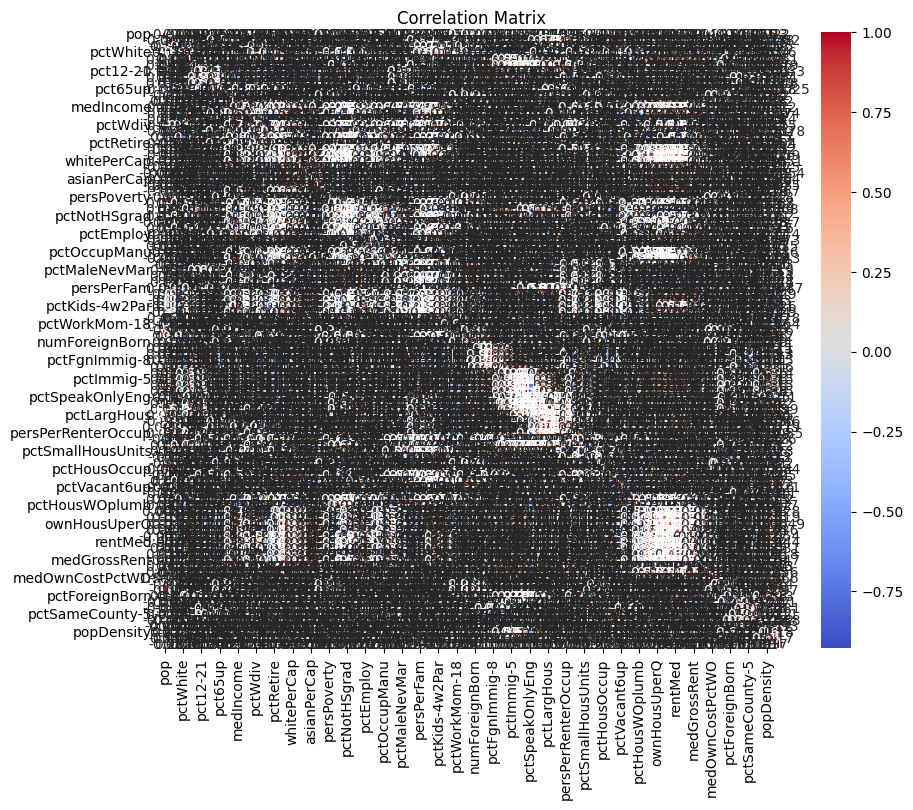

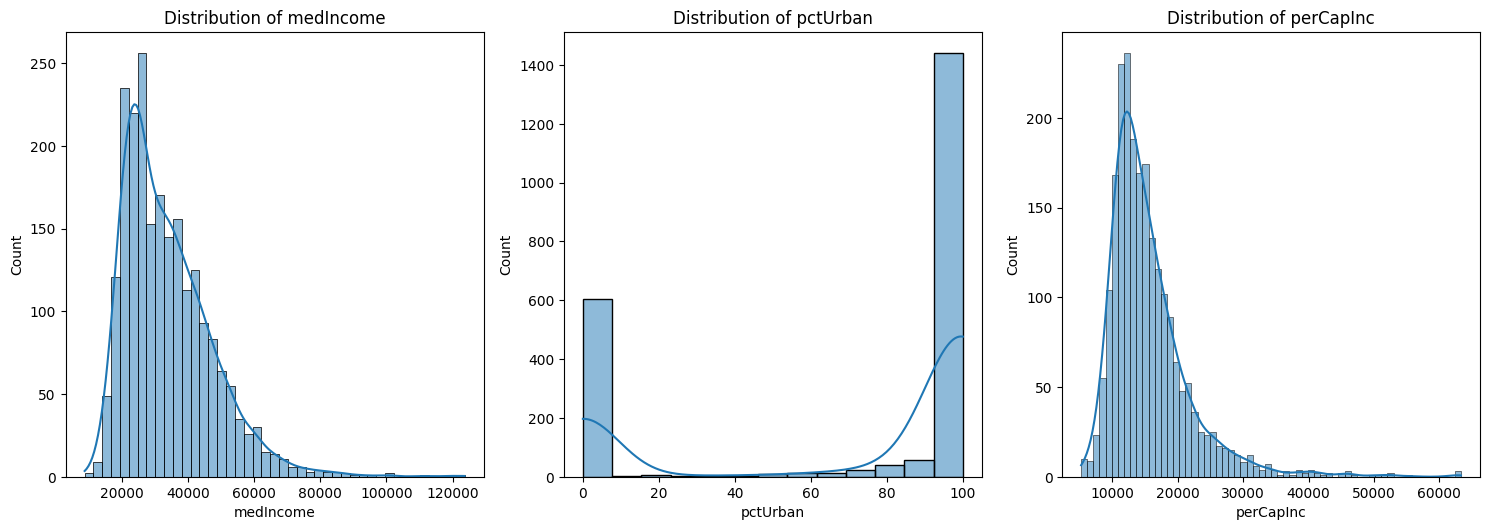

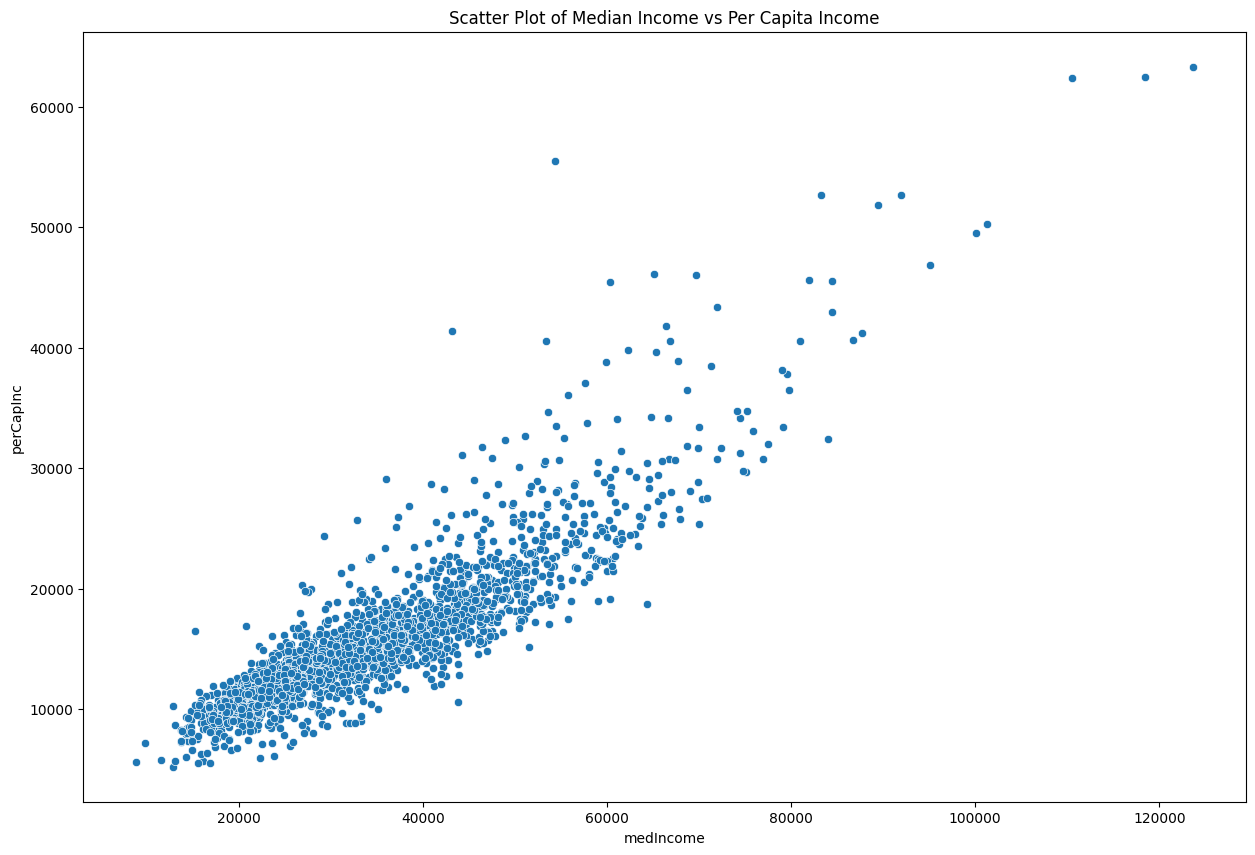

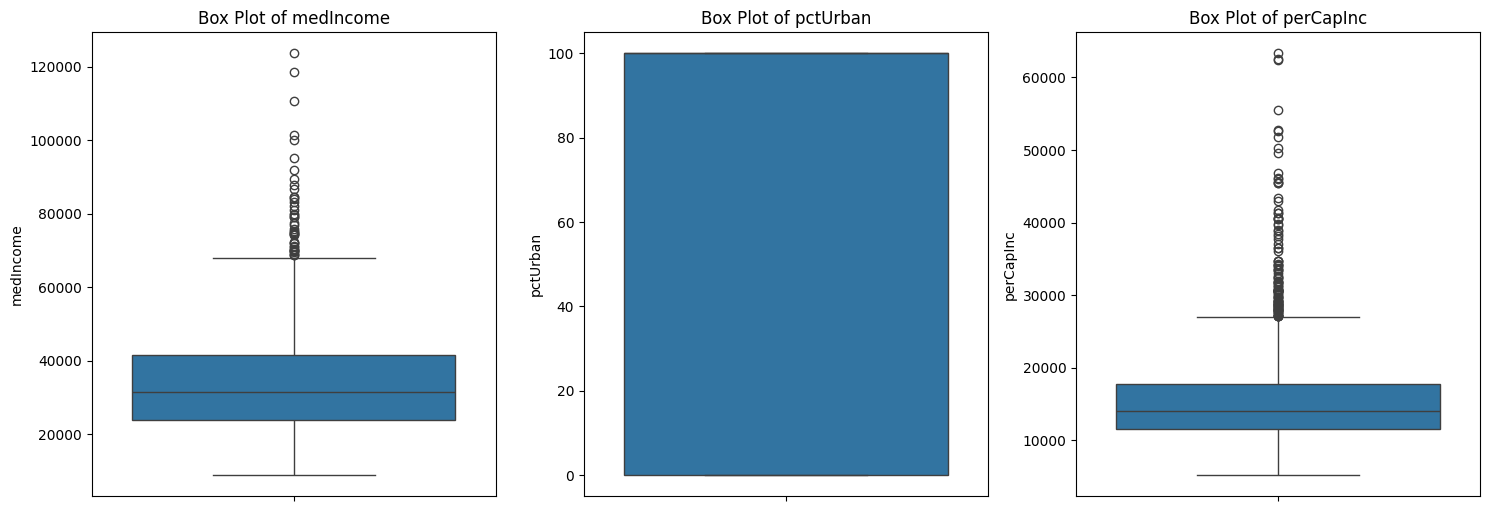

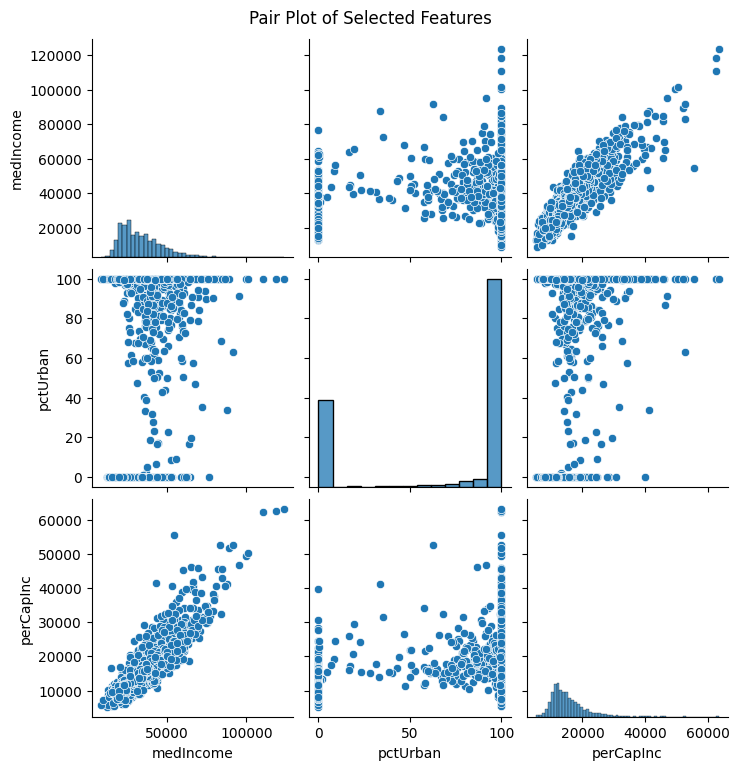

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('communities_and_crime_less_missing.csv')

# Display first few rows of the dataset
print(data.head())

# Drop non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])


# Correlation matrix
correlation_matrix = numeric_data.corr()

# .1. Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 2. Distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(['medIncome', 'pctUrban', 'perCapInc']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# 3. Scatter Plots
plt.figure(figsize=(15, 10))
sns.scatterplot(x='medIncome', y='perCapInc', data=data)
plt.title('Scatter Plot of Median Income vs Per Capita Income')
plt.show()

# 4. Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(['medIncome', 'pctUrban', 'perCapInc']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# 5. Pair Plots
sns.pairplot(data[['medIncome', 'pctUrban', 'perCapInc']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

#**3. Data Processing**

In [4]:
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
numeric_data = data.drop(columns=['State'])

# Check for any remaining non-numeric columns
print(numeric_data.dtypes)

# Ensure no non-numeric data is left
# Convert any non-numeric data to numeric if needed
# For example, if there are categorical variables, encode them

# If there are categorical variables, you should encode them
# Here is an example of one-hot encoding
# numeric_data = pd.get_dummies(numeric_data, columns=['categorical_column'])

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numeric_data)

# Convert the scaled data back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Display the first few rows of the scaled data
print(scaled_df.head())


pop                   int64
perHoush            float64
pctBlack            float64
pctWhite            float64
pctAsian            float64
                     ...   
pctSameState-5      float64
landArea            float64
popDensity          float64
pctUsePubTrans      float64
pctOfficDrugUnit    float64
Length: 102, dtype: object
        pop  perHoush  pctBlack  pctWhite  pctAsian   pctHisp  pct12-21  \
0 -0.201091  1.175511 -0.559192  0.475175  0.856235 -0.416149 -0.437364   
1 -0.146622  0.337299 -0.599209  0.706056  0.172105 -0.486762 -0.760544   
2 -0.116212 -0.830211 -0.603422  0.630518  0.169869 -0.383928 -0.683070   
3 -0.178234 -0.920020 -0.536025  0.814491 -0.485197 -0.497046 -0.419656   
4 -0.204684  0.157682 -0.618165  0.315569 -0.335403 -0.509386  2.216698   

   pct12-29  pct16-24   pct65up  ...  persHomeless  pctForeignBorn  \
0 -1.004000 -0.510125 -0.106018  ...     -0.072631        0.394424   
1 -1.026653 -0.585510  1.118732  ...     -0.072631        0.114025   
2 -0

#**4. Model Building**

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming 'perCapInc' is your target variable
target_variable = 'perCapInc'

# Separate features and target
X = scaled_df.drop(columns=[target_variable])
y = scaled_df[target_variable]

# Handling missing values if any
# For demonstration, we'll use SimpleImputer to fill missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results[name] = {'R^2': r2, 'MSE': mse}

# Display the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  R^2: {metrics['R^2']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")



Linear Regression:
  R^2: 0.9909
  MSE: 0.0094
Decision Tree:
  R^2: 0.9797
  MSE: 0.0211
Random Forest:
  R^2: 0.9915
  MSE: 0.0089


#**5. Model Evaluation**

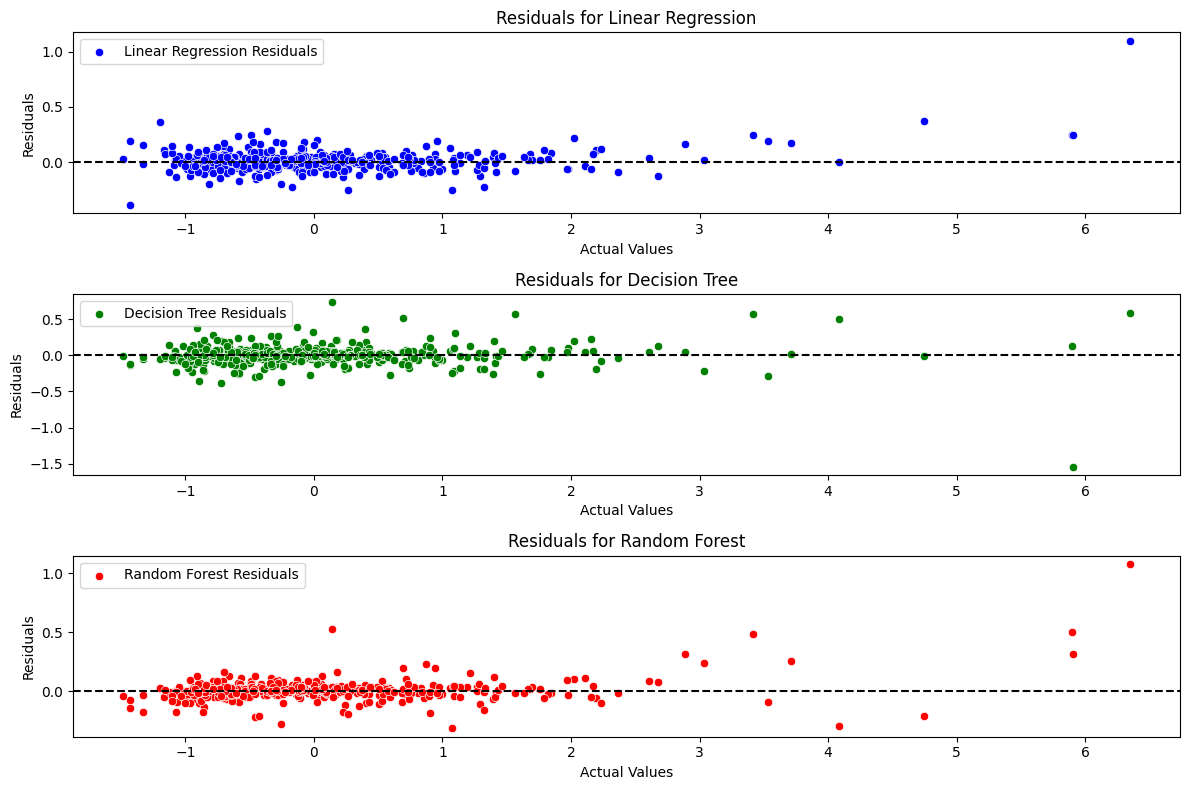

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for all models
y_pred_lr = models['Linear Regression'].predict(X_test)
y_pred_dt = models['Decision Tree'].predict(X_test)
y_pred_rf = models['Random Forest'].predict(X_test)

# Plot residuals for all models
plt.figure(figsize=(12, 8))

# Residuals for Linear Regression
plt.subplot(3, 1, 1)
sns.scatterplot(x=y_test, y=y_test - y_pred_lr, color='blue', label='Linear Regression Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Residuals for Decision Tree
plt.subplot(3, 1, 2)
sns.scatterplot(x=y_test, y=y_test - y_pred_dt, color='green', label='Decision Tree Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals for Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

# Residuals for Random Forest
plt.subplot(3, 1, 3)
sns.scatterplot(x=y_test, y=y_test - y_pred_rf, color='red', label='Random Forest Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals for Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


#**6. Prediction vs Actual Plots**

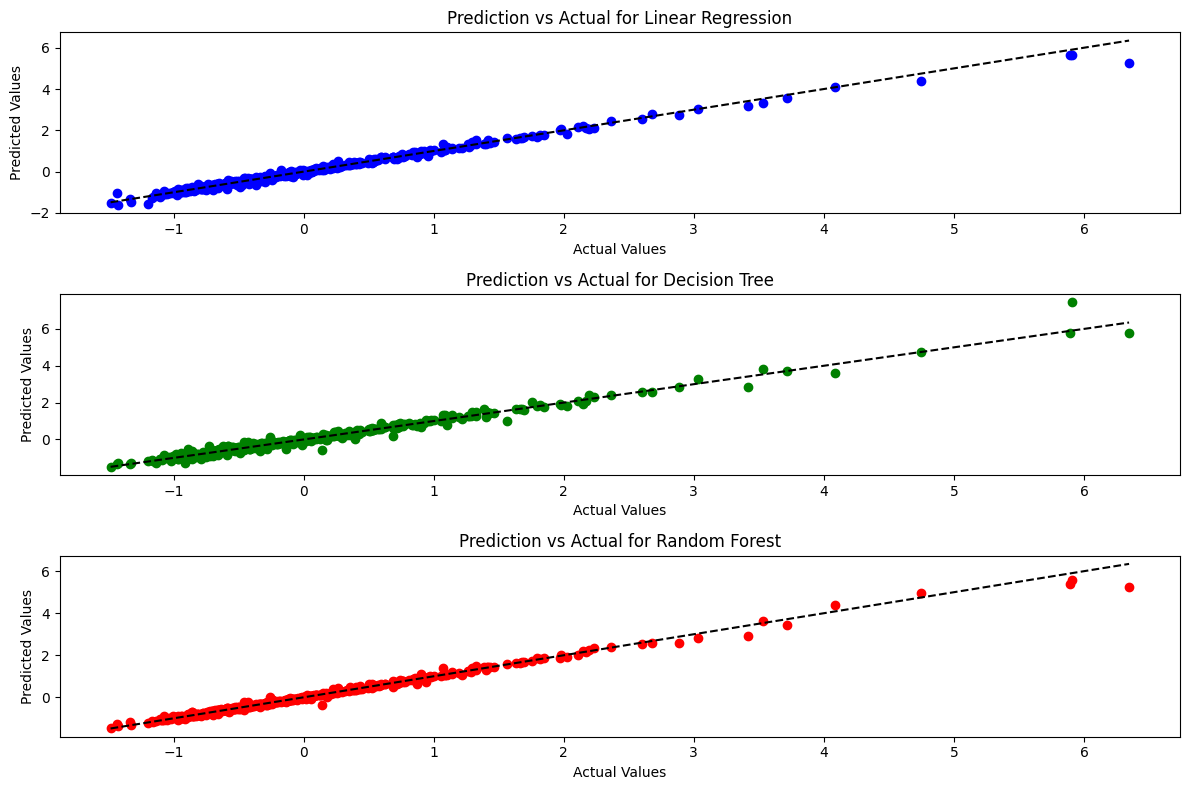

In [7]:
# Plot Prediction vs Actual for all models
plt.figure(figsize=(12, 8))

# Prediction vs Actual for Linear Regression
plt.subplot(3, 1, 1)
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Prediction vs Actual for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Prediction vs Actual for Decision Tree
plt.subplot(3, 1, 2)
plt.scatter(y_test, y_pred_dt, color='green', label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Prediction vs Actual for Decision Tree')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Prediction vs Actual for Random Forest
plt.subplot(3, 1, 3)
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title('Prediction vs Actual for Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()
